<a href="https://colab.research.google.com/github/Pathway2008/Weblog/blob/main/Weblog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Weblog/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Weblog/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Weblog/sample_submission.csv')

In [ ]:
'''
sessionID : 세션 ID

userID : 사용자 ID

TARGET : 세션에서 발생한 총 조회수

browser : 사용된 브라우저

OS : 사용된 기기의 운영체제

device : 사용된 기기

new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)

quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)

duration : 총 세션 시간 (단위: 초)

bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)

transaction : 세션 내에서 발생의 거래의 수

transaction_revenue : 총 거래 수익

continent : 세션이 발생한 대륙

subcontinent : 세션이 발생한 하위 대륙

country : 세션이 발생한 국가

traffic_source : 트래픽이 발생한 소스

traffic_medium : 트래픽 소스의 매체

keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정

referral_path : traffic_medium이 referral인 경우 설정되는 경로
'''

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [3]:
train.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79786 entries, 0 to 79785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessionID            79786 non-null  object 
 1   userID               79786 non-null  object 
 2   browser              79786 non-null  object 
 3   OS                   79786 non-null  object 
 4   device               79786 non-null  object 
 5   new                  79786 non-null  int64  
 6   quality              79786 non-null  float64
 7   duration             79786 non-null  float64
 8   bounced              79786 non-null  int64  
 9   transaction          79786 non-null  float64
 10  transaction_revenue  79786 non-null  float64
 11  continent            79786 non-null  object 
 12  subcontinent         79786 non-null  object 
 13  country              79786 non-null  object 
 14  traffic_source       79786 non-null  object 
 15  traffic_medium       79786 non-null 

In [6]:
train['keyword'].describe()

count        114614
unique          623
top       Category8
freq         103584
Name: keyword, dtype: object

In [7]:
train['referral_path'].describe()

count         91182
unique         1578
top       Category1
freq          18687
Name: referral_path, dtype: object

In [78]:
train.drop(['sessionID','userID'],axis=1,inplace=True)
test.drop(['sessionID','userID'],axis=1,inplace=True)

In [10]:
train.columns

Index(['TARGET', 'browser', 'OS', 'device', 'new', 'quality', 'duration',
       'bounced', 'transaction', 'transaction_revenue', 'continent',
       'subcontinent', 'country', 'traffic_source', 'traffic_medium',
       'keyword', 'referral_path'],
      dtype='object')

In [18]:
object_columns = train.select_dtypes(include=['object'])
object_columns.columns

Index(['browser', 'OS', 'device', 'continent', 'subcontinent', 'country',
       'traffic_source', 'traffic_medium', 'keyword', 'referral_path'],
      dtype='object')

In [19]:
object_columns = test.select_dtypes(include=['object'])
object_columns.columns

Index(['browser', 'OS', 'device', 'continent', 'subcontinent', 'country',
       'traffic_source', 'traffic_medium', 'keyword', 'referral_path'],
      dtype='object')

In [79]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

for feature in object_columns.columns:
    le = LabelEncoder()

    # Convert the column to string type
    train[feature] = train[feature].astype(str)
    le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    # Make sure the test set has the same data type
    test[feature] = test[feature].astype(str)

    # Handle unseen labels in the test set
    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    test[feature] = le.transform(test[feature])

In [25]:
train.head()

,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,17.0,27,7,0,0,45.0,839.0,0,0.0,0.0,2,12,196,46,5,621,1578
1,3.0,27,17,0,1,1.0,39.0,0,0.0,0.0,4,22,67,46,5,621,1578
2,1.0,51,1,1,1,1.0,0.0,1,0.0,0.0,3,16,115,0,0,623,1578
3,1.0,27,7,0,1,1.0,0.0,1,0.0,0.0,2,12,196,1,2,623,1578
4,1.0,27,20,1,0,1.0,0.0,1,0.0,0.0,2,12,196,87,6,623,1180


In [37]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from math import sqrt
from sklearn.metrics import make_scorer, mean_squared_error

In [52]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [27]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [80]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [81]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)


# Extra Trees
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_scores = cross_val_score(et_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)


In [83]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = rmse_scorer(y_test, xgb_predictions)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

In [ ]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(random_seed=42)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
cat_rmse = rmse_scorer(y_test, catboost_predictions)

catboost_scores = cross_val_score(catboost_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

In [86]:
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {catboost_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

Random Forest Cross-Validation RMSE: 2.9914427371375583
RF test RMSE: 2.8003372466393395

Extra Trees Cross-Validation RMSE: 3.0720369078024325
ET test RMSE: 2.9936589320127

XGBoost Cross-Validation RMSE: 3.1010735875494513
XGBoost test RMSE: 2.561024812255096

CatBoost Cross-Validation RMSE: 2.924099377664811
CatBoost test RMSE: 2.5566722696267425


In [87]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('xgb', xgb_model), ('catboost', catboost_model)])

# Train the VotingRegressor
voting_regressor.fit(X_train, y_train)

# Make predictions on the test set
voting_predictions = voting_regressor.predict(X_test)

# Evaluate the VotingRegressor
voting_rmse = rmse_scorer(y_test, voting_predictions)

voting_scores = cross_val_score(voting_regressor, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 4.4282170	total: 208ms	remaining: 41.3s
5:	learn: 4.2687894	total: 228ms	remaining: 37.8s
6:	learn: 4.1321245	total: 249ms	remaining: 35.3s
7:	learn: 4.0109188	total: 274ms	remaining: 34s
8:	learn: 3.9093109	total: 295ms	remaining: 32.5s
9:	learn: 3.8153547	total: 318ms	remaining: 31.4s
10:	learn: 3.7290839	total: 339ms	remaining: 30.5s
11:	learn: 3.6613904	total: 360ms	remaining: 29.7s
12:	learn: 3.5997318	total: 405ms	remaining: 30.7s
13:	learn: 3.5406594	total: 436ms	remaining: 30.7s
14:	learn: 3.4858387	total: 459ms	remaining: 30.1s
15:	learn: 3.4392919	total: 481ms	remaining: 29.6s
16:	learn: 3.4009246	total: 503ms	remaining: 29.1s
17:	learn: 3.3622603	total: 525ms	remaining: 28.6s
18:	learn: 3.3288772	total: 547ms	remaining: 28.3s
19:	learn: 3.3000169	total: 571ms	remaining: 28s
20:	learn: 3.2738551	total: 598ms	remaining: 27.9s
21:	learn: 3.2507414	total: 628ms	remaining: 27.9s
22:	learn: 3.2264273	total: 651ms	remaining: 27.6s
23:	l

In [88]:
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 2.9575300925589514
VotingRegressor test RMSE: 2.520347798158847


In [89]:
voting_predictions = voting_regressor.predict(test)

In [90]:
sub['TARGET'] = voting_predictions
sub.to_csv('xgb+cat.csv',index=False)

In [91]:
from sklearn.ensemble import VotingRegressor
voting_regressor2 = VotingRegressor([('xgb', xgb_model), ('catboost', catboost_model),('rf',rf_model),('et',et_model)])

# Train the VotingRegressor
voting_regressor2.fit(X_train, y_train)

# Make predictions on the test set
voting_predictions2 = voting_regressor2.predict(X_test)

# Evaluate the VotingRegressor
voting_rmse = rmse_scorer(y_test, voting_predictions2)

voting_scores = cross_val_score(voting_regressor2, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 4.4282170	total: 113ms	remaining: 22.5s
5:	learn: 4.2687894	total: 135ms	remaining: 22.4s
6:	learn: 4.1321245	total: 158ms	remaining: 22.4s
7:	learn: 4.0109188	total: 180ms	remaining: 22.3s
8:	learn: 3.9093109	total: 210ms	remaining: 23.1s
9:	learn: 3.8153547	total: 250ms	remaining: 24.8s
10:	learn: 3.7290839	total: 274ms	remaining: 24.6s
11:	learn: 3.6613904	total: 295ms	remaining: 24.3s
12:	learn: 3.5997318	total: 318ms	remaining: 24.1s
13:	learn: 3.5406594	total: 341ms	remaining: 24s
14:	learn: 3.4858387	total: 365ms	remaining: 24s
15:	learn: 3.4392919	total: 389ms	remaining: 23.9s
16:	learn: 3.4009246	total: 417ms	remaining: 24.1s
17:	learn: 3.3622603	total: 439ms	remaining: 24s
18:	learn: 3.3288772	total: 465ms	remaining: 24s
19:	learn: 3.3000169	total: 488ms	remaining: 23.9s
20:	learn: 3.2738551	total: 511ms	remaining: 23.8s
21:	learn: 3.2507414	total: 533ms	remaining: 23.7s
22:	learn: 3.2264273	total: 555ms	remaining: 23.6s
23:	learn

In [92]:
print(f'VotingRegressor(4models) Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor(4models) Cross-Validation RMSE: 2.855737711009227
VotingRegressor test RMSE: 2.573332160789868


In [93]:
voting_predictions = voting_regressor.predict(test)

In [94]:
sub['TARGET'] = voting_predictions
sub.to_csv('xgb+cat+rf+et.csv',index=False)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 11, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


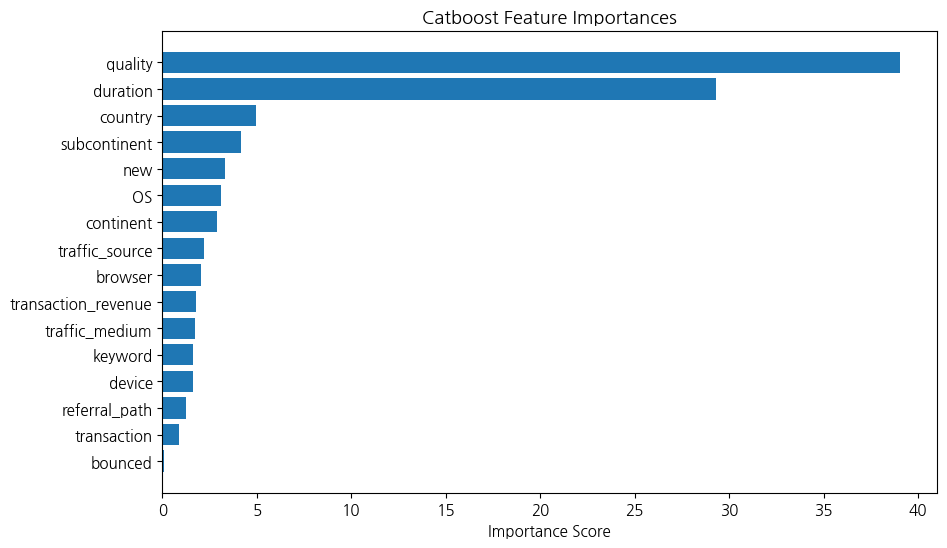

In [57]:
feature_importances = catboost_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Catboost Feature Importances')
plt.show()

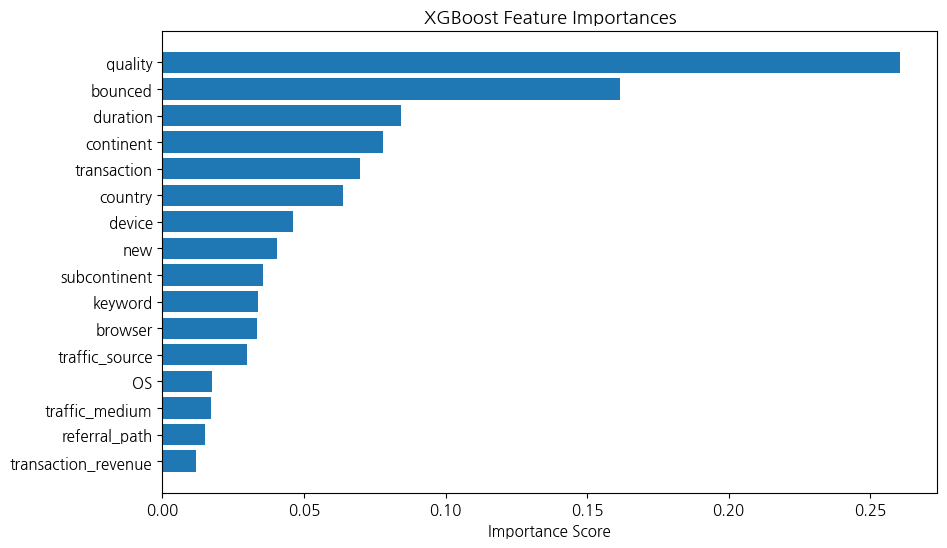

In [51]:
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importances')
plt.show()

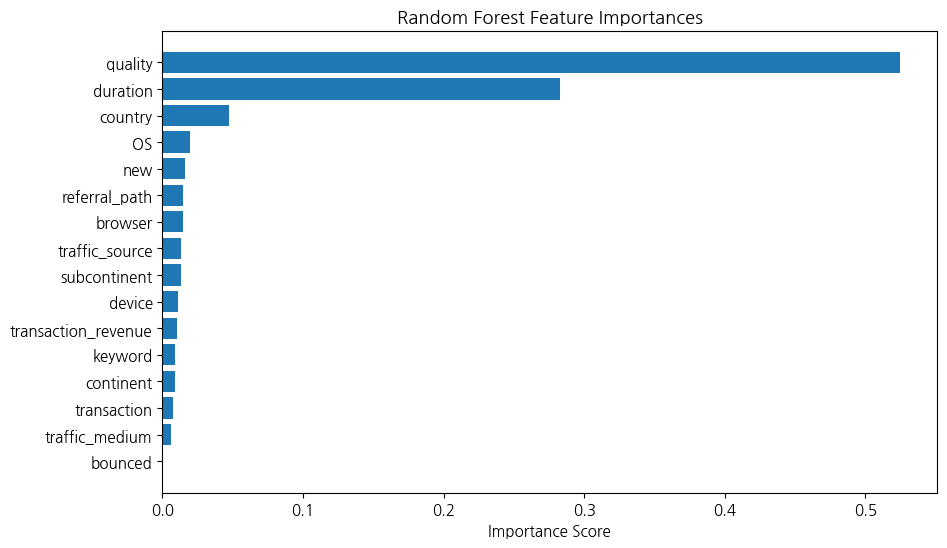

In [44]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.show()

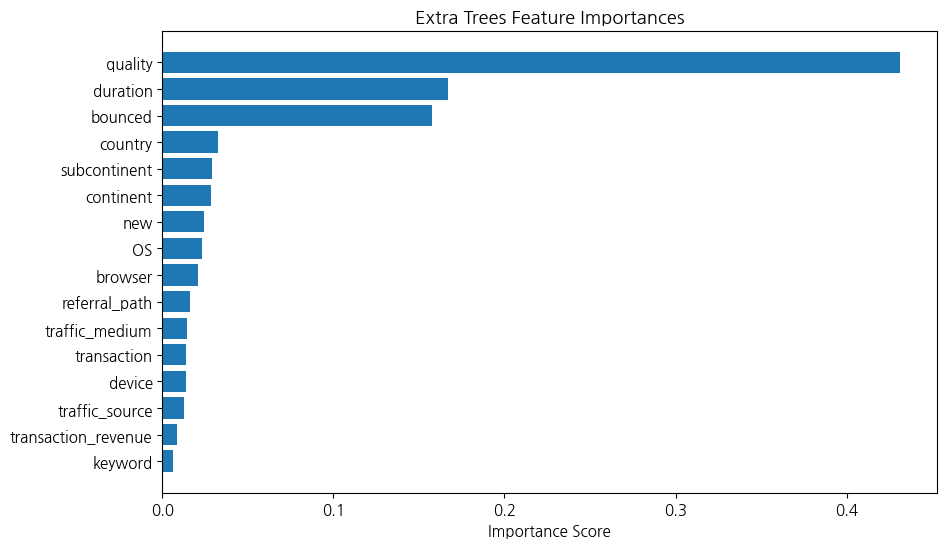

In [45]:
# Get feature importances
feature_importances = et_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Extra Trees Feature Importances')
plt.show()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               252289 non-null  float64
 1   browser              252289 non-null  int64  
 2   OS                   252289 non-null  int64  
 3   device               252289 non-null  int64  
 4   new                  252289 non-null  int64  
 5   quality              252289 non-null  float64
 6   duration             252289 non-null  float64
 7   bounced              252289 non-null  int64  
 8   transaction          252289 non-null  float64
 9   transaction_revenue  252289 non-null  float64
 10  continent            252289 non-null  int64  
 11  subcontinent         252289 non-null  int64  
 12  country              252289 non-null  int64  
 13  traffic_source       252289 non-null  int64  
 14  traffic_medium       252289 non-null  int64  
 15  keyword          

In [65]:
from sklearn.model_selection import train_test_split
X = train.drop(['TARGET','traffic_medium','referral_path','transaction','device','traffic_source','transaction_revenue','keyword'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [66]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [67]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Random Forest
rf_model = RandomForestRegressor(random_state=43)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)


# Extra Trees
et_model = ExtraTreesRegressor(random_state=43)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_scores = cross_val_score(et_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

#xgb
xgb_model = xgb.XGBRegressor(random_state=43)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
xgb_rmse = rmse_scorer(y_test, xgb_predictions)

#cat
cat_model = CatBoostRegressor(random_seed=43)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)

cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
cat_rmse = rmse_scorer(y_test, cat_predictions)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 4.3525026	total: 88.7ms	remaining: 17.6s
5:	learn: 4.1875892	total: 107ms	remaining: 17.8s
6:	learn: 4.0440468	total: 127ms	remaining: 18s
7:	learn: 3.9194807	total: 147ms	remaining: 18.2s
8:	learn: 3.8098830	total: 164ms	remaining: 18.1s
9:	learn: 3.7173282	total: 186ms	remaining: 18.4s
10:	learn: 3.6314662	total: 226ms	remaining: 20.3s
11:	learn: 3.5556752	total: 244ms	remaining: 20.1s
12:	learn: 3.4861284	total: 262ms	remaining: 19.9s
13:	learn: 3.4303588	total: 280ms	remaining: 19.7s
14:	learn: 3.3842285	total: 298ms	remaining: 19.5s
15:	learn: 3.3358815	total: 318ms	remaining: 19.6s
16:	learn: 3.2953483	total: 336ms	remaining: 19.4s
17:	learn: 3.2593063	total: 354ms	remaining: 19.3s
18:	learn: 3.2309756	total: 372ms	remaining: 19.2s
19:	learn: 3.2009378	total: 394ms	remaining: 19.3s
20:	learn: 3.1764564	total: 412ms	remaining: 19.2s
21:	learn: 3.1557266	total: 432ms	remaining: 19.2s
22:	learn: 3.1335194	total: 451ms	remaining: 19.2s
23

In [62]:
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

Random Forest Cross-Validation RMSE: 3.295528062451281
RF test RMSE: 3.2351485689999135

Extra Trees Cross-Validation RMSE: 3.442723283715556
ET test RMSE: 3.5903094475761392

XGBoost Cross-Validation RMSE: 3.1954996936666404
XGBoost test RMSE: 3.0722912290207716
CatBoost Cross-Validation RMSE: 3.125321027633273
CatBoost test RMSE: 3.0394849709497453


In [68]:
# 'TARGET','traffic_medium','referral_path','transaction','device','traffic_source','transaction_revenue','keyword'
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}')

Random Forest Cross-Validation RMSE: 3.0520184452112593
RF test RMSE: 2.988685015867489

Extra Trees Cross-Validation RMSE: 3.1702525172463885
ET test RMSE: 3.1068506517287986

XGBoost Cross-Validation RMSE: 3.110467516074295
XGBoost test RMSE: 2.8541540421072322

CatBoost Cross-Validation RMSE: 2.9323476862400986
CatBoost test RMSE: 2.929371679716332


In [69]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('xgb', xgb_model), ('catboost', catboost_model)])#cat_model로 수정필요

# Train the VotingRegressor
voting_regressor.fit(X_train, y_train)

# Make predictions on the test set
voting_predictions = voting_regressor.predict(X_test)

# Evaluate the VotingRegressor
voting_rmse = rmse_scorer(y_test, voting_predictions)

voting_scores = cross_val_score(voting_regressor, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 4.3357934	total: 116ms	remaining: 23s
5:	learn: 4.1728226	total: 134ms	remaining: 22.2s
6:	learn: 4.0297436	total: 152ms	remaining: 21.6s
7:	learn: 3.9080716	total: 170ms	remaining: 21.1s
8:	learn: 3.8026972	total: 194ms	remaining: 21.4s
9:	learn: 3.7078738	total: 212ms	remaining: 21s
10:	learn: 3.6263626	total: 231ms	remaining: 20.7s
11:	learn: 3.5522375	total: 248ms	remaining: 20.4s
12:	learn: 3.4900376	total: 266ms	remaining: 20.2s
13:	learn: 3.4329216	total: 284ms	remaining: 20s
14:	learn: 3.3845650	total: 302ms	remaining: 19.8s
15:	learn: 3.3391447	total: 321ms	remaining: 19.7s
16:	learn: 3.2983162	total: 342ms	remaining: 19.8s
17:	learn: 3.2651090	total: 360ms	remaining: 19.6s
18:	learn: 3.2368209	total: 382ms	remaining: 19.7s
19:	learn: 3.2085792	total: 406ms	remaining: 19.9s
20:	learn: 3.1830123	total: 426ms	remaining: 19.8s
21:	learn: 3.1605923	total: 444ms	remaining: 19.8s
22:	learn: 3.1382146	total: 465ms	remaining: 19.8s
23:	lea

In [70]:
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 2.9779684048918114
VotingRegressor test RMSE: 2.8540623124937023


In [75]:
voting_predictions = voting_regressor.predict(test.drop(['traffic_medium','referral_path','transaction','device','traffic_source','transaction_revenue','keyword'],axis=1))

In [76]:
sub['TARGET'] = voting_predictions
sub.to_csv('some_col(xgb+cat).csv',index=False)